# <font color= Navy ><u><center>Neural Network For Object Recognition</center></u> </font>

# <img src="https://miro.medium.com/max/1200/1*ghwCPKjjWKDv9HTsMTBwDA.jpeg">

## <font color=navy><u>Index</u></font>:
1. [Importing python modules, helper functions and dataset](#import)
2. [Data Exploration](#eda)
3. [Implementing Neural Network](#nn) 
4. [Implementing Batch Normalisation](#bn)
5. [Implementing Batch Normalisation With Dropout Layer](#dl)
6. [Performance & Prediction On Test Data](#pred)
7. [Final Result Summary](#summary)

<a id='import'></a>

## <font color= Navy > Import libraries </font>

In [ ]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

In [109]:
import numpy as np
import pandas as pd
import h5py 
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential # groups a linear stack of layers
from tensorflow.keras.utils import to_categorical # for one hot encoding of target feature
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout 
from tensorflow.keras import optimizers

In [194]:
# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

<a id='eda'></a>

## <font color= Navy > Data Exploration </font>

In [132]:
nn_df = h5py.File("/content/drive/My Drive/SVHN_single_grey1.h5", 'r')

In [111]:
nn_df.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [133]:
#Load the training, testing, and validation data
X_train=nn_df['X_train'][:]
X_test=nn_df['X_test'][:]
X_val=nn_df['X_val'][:]
y_train=nn_df['y_train'][:]
y_test=nn_df['y_test'][:]
y_val=nn_df['y_val'][:]

### <font color= Navy > Eye balling data </font>

In [134]:
# Printing the shape and data type of training, testing, and validation data
print("Training data X-- Shape :", X_train.shape,"and Data Type : ", X_train.dtype)
print("Testing data X-- Shape :", X_test.shape,"and Data Type : ", X_test.dtype)
print("Validation data X-- Shape :", X_val.shape,"and Data Type : ", X_val.dtype)
print("Training data y-- Shape :", y_train.shape,"and Data Type : ", y_train.dtype)
print("Testing data y-- Shape :", y_test.shape,"and Data Type : ", y_test.dtype)
print("Validation data y-- Shape :", y_val.shape,"and Data Type : ", y_val.dtype)

Training data X-- Shape : (42000, 32, 32) and Data Type :  float32
Testing data X-- Shape : (18000, 32, 32) and Data Type :  float32
Validation data X-- Shape : (60000, 32, 32) and Data Type :  float32
Training data y-- Shape : (42000,) and Data Type :  uint8
Testing data y-- Shape : (18000,) and Data Type :  uint8
Validation data y-- Shape : (60000,) and Data Type :  uint8


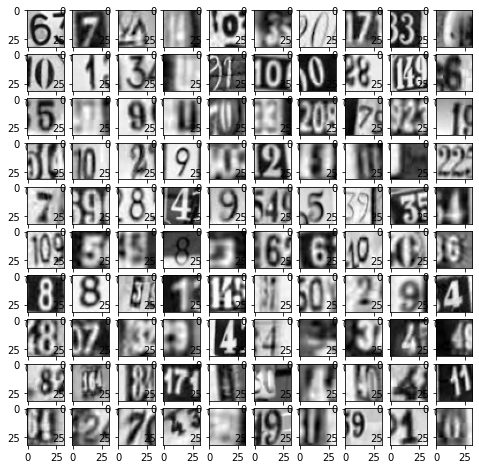

In [114]:
fig=plt.figure(figsize=(8,8))
columns=10
rows=10
for i in range(1, columns*rows+1):
    img=X_train[i]
    fig.add_subplot(rows,columns,i)
    plt.imshow(img,cmap='gray')
plt.show()

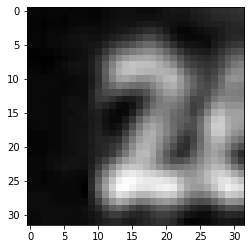

Label:  2


In [115]:
# show the number in the dataset
position = 17999
plt.imshow(X_test[position],cmap='gray')    
plt.show()
print('Label: ', y_test[position])

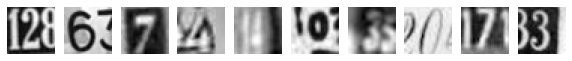

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [116]:
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32,32),cmap='gray')
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

<a id='nn'></a>

## <font color= Navy > Implementing Neural Network </font>

### <font color= Navy > Reshape input data </font>

In [135]:
X_train.shape

(42000, 32, 32)

In [136]:
#Reshape data from 2D to 1D -> 32X32 to 1024
X_train = np.asarray(X_train).reshape(42000,1024)
X_test = np.asarray(X_test).reshape(18000,1024)
X_val = np.asarray(X_val).reshape(60000,1024)

### <font color= Navy > Normalise data </font>

In [137]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')

X_train /= 255
X_test /= 255
X_val /=255

### <font color= Navy > Converting output labels to category </font>

In [138]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)

In [139]:
print(X_train.shape, X_test.shape,X_val.shape, y_train.shape, y_test.shape,y_val.shape)

(42000, 1024) (18000, 1024) (60000, 1024) (42000, 10) (18000, 10) (60000, 10)


### <font color= Navy > Implementing first Deep learning model </font>

In [165]:
##Initialize the Artificial Neural Network Classifier
nn_model1 = Sequential()

# Input Layer
#Adding Input layer and activation functions ReLU
nn_model1.add(Dense(512,input_shape = (1024,)))
#Adding Activation function
nn_model1.add(Activation('relu'))

#Hidden Layer 1
nn_model1.add(Dense(256))
nn_model1.add(Activation('relu'))

# # #Hidden Layer 2
nn_model1.add(Dense(128))
nn_model1.add(Activation('relu'))

# # #Hidden Layer 3
nn_model1.add(Dense(64))
nn_model1.add(Activation('relu'))

# #Hidden Layer 4
nn_model1.add(Dense(32))
nn_model1.add(Activation('relu'))

# Output Layer
nn_model1.add(Dense(10))
#Adding Activation function
nn_model1.add(Activation('softmax'))

In [166]:
nn_model1.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 512)               524800    
_________________________________________________________________
activation_75 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_83 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_76 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_84 (Dense)             (None, 128)               32896     
_________________________________________________________________
activation_77 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_85 (Dense)             (None, 64)              

In [7]:
print("Number of Train Parameters in the first layer = 1024*512 (weights) + 512 (bias)")
print(".i.e 584800")

Number of Train Parameters in the first layer = 1024*512 (weights) + 512 (bias)
.i.e 584800


In [167]:
# compiling the ANN classifier
nn_model1.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

<font color= Navy > **Blogs on SGD , Different Loss Functions & Epoch/Batch Size** </font>

https://www.geeksforgeeks.org/ml-stochastic-gradient-descent-sgd/

https://medium.com/analytics-vidhya/introduction-of-different-types-of-loss-functions-in-machine-learning-and-deep-learning-66ef7804668b

https://medium.com/@phuctrt/loss-functions-why-what-where-or-when-189815343d3f

https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9

In [168]:
nn_model1.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size = 200, epochs = 10, verbose = 1)

Epoch 1/10
210/210 [==============================] - 5s 22ms/step - loss: 2.3000 - accuracy: 0.1123 - val_loss: 2.2933 - val_accuracy: 0.1400
Epoch 2/10
210/210 [==============================] - 4s 21ms/step - loss: 2.2881 - accuracy: 0.1464 - val_loss: 2.2821 - val_accuracy: 0.1444
Epoch 3/10
210/210 [==============================] - 4s 21ms/step - loss: 2.2744 - accuracy: 0.1709 - val_loss: 2.2655 - val_accuracy: 0.1955
Epoch 4/10
210/210 [==============================] - 4s 21ms/step - loss: 2.2542 - accuracy: 0.2038 - val_loss: 2.2386 - val_accuracy: 0.2264
Epoch 5/10
210/210 [==============================] - 4s 21ms/step - loss: 2.2207 - accuracy: 0.2370 - val_loss: 2.1944 - val_accuracy: 0.2684
Epoch 6/10
210/210 [==============================] - 4s 21ms/step - loss: 2.1627 - accuracy: 0.2684 - val_loss: 2.1158 - val_accuracy: 0.2859
Epoch 7/10
210/210 [==============================] - 4s 21ms/step - loss: 2.0795 - accuracy: 0.2840 - val_loss: 2.0093 - val_accuracy: 0.3308

In [169]:
results = nn_model1.evaluate(X_val, y_val)
print('Val_acc using simple NN SGD Optimizer : ', results[1])

1875/1875 [==============================] - 5s 3ms/step - loss: 1.8536 - accuracy: 0.3433
Val_acc using simple NN SGD Optimizer :  0.3433000147342682


In [170]:
#Store the accuracy results for each model in a dataframe for final comparison
results_on_val = pd.DataFrame({'Method':['NN with SGD Optimizer'], 'accuracy': results[1]},index={'1'})
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN with SGD Optimizer,0.3433


<font color= Navy > **Model is underfitting with SGD optimizer, trying Adam optimizer** </font>

In [171]:
# compiling the ANN classifier
nn_model1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [172]:
nn_model1.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size = 200, epochs = 10, verbose = 1)

Epoch 1/10
210/210 [==============================] - 5s 23ms/step - loss: 2.1201 - accuracy: 0.2055 - val_loss: 1.8114 - val_accuracy: 0.3553
Epoch 2/10
210/210 [==============================] - 5s 22ms/step - loss: 1.5384 - accuracy: 0.4702 - val_loss: 1.3413 - val_accuracy: 0.5519
Epoch 3/10
210/210 [==============================] - 5s 22ms/step - loss: 1.2650 - accuracy: 0.5810 - val_loss: 1.1996 - val_accuracy: 0.6072
Epoch 4/10
210/210 [==============================] - 5s 22ms/step - loss: 1.1332 - accuracy: 0.6350 - val_loss: 1.1226 - val_accuracy: 0.6287
Epoch 5/10
210/210 [==============================] - 5s 22ms/step - loss: 1.0225 - accuracy: 0.6757 - val_loss: 0.9888 - val_accuracy: 0.6846
Epoch 6/10
210/210 [==============================] - 5s 22ms/step - loss: 0.9542 - accuracy: 0.6986 - val_loss: 0.9292 - val_accuracy: 0.7112
Epoch 7/10
210/210 [==============================] - 5s 22ms/step - loss: 0.8954 - accuracy: 0.7184 - val_loss: 0.9257 - val_accuracy: 0.7104

In [173]:
results_1 = nn_model1.evaluate(X_val, y_val)
print('Val_acc using simple NN SGD Optimizer : ', results_1[1])

1875/1875 [==============================] - 7s 4ms/step - loss: 0.7598 - accuracy: 0.7620
Val_acc using simple NN SGD Optimizer :  0.7619500160217285


In [174]:
result_df = pd.DataFrame({'Method':['NN with Adam Optimizer'], 'accuracy': [results_1[1]]},index={'2'})
results_on_val= pd.concat([results_on_val, result_df])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN with SGD Optimizer,0.34330
2,NN with Adam Optimizer,0.76195


<font color= Navy > **Model performance has improved significantly with Adam, trying to improve the accuracy with tunning Learning rate. Since LR is low, the model will learn slow hence increasing the epoch value to 100** </font>

In [175]:
#Setting the learning rate
adam = optimizers.Adam(lr = 0.0001)
# compiling the ANN classifier
nn_model1.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training data
nn_model1.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 5s 23ms/step - loss: 0.6543 - accuracy: 0.7962 - val_loss: 0.6676 - val_accuracy: 0.7951
Epoch 2/100
210/210 [==============================] - 5s 22ms/step - loss: 0.6403 - accuracy: 0.8013 - val_loss: 0.6635 - val_accuracy: 0.7965
Epoch 3/100
210/210 [==============================] - 5s 22ms/step - loss: 0.6314 - accuracy: 0.8042 - val_loss: 0.6440 - val_accuracy: 0.8025
Epoch 4/100
210/210 [==============================] - 5s 22ms/step - loss: 0.6230 - accuracy: 0.8064 - val_loss: 0.6461 - val_accuracy: 0.8017
Epoch 5/100
210/210 [==============================] - 5s 22ms/step - loss: 0.6150 - accuracy: 0.8086 - val_loss: 0.6409 - val_accuracy: 0.8028
Epoch 6/100
210/210 [==============================] - 5s 22ms/step - loss: 0.6093 - accuracy: 0.8118 - val_loss: 0.6334 - val_accuracy: 0.8053
Epoch 7/100
210/210 [==============================] - 5s 22ms/step - loss: 0.6048 - accuracy: 0.8130 - val_loss: 0.6284 - val_accuracy:

In [176]:
results_2 = nn_model1.evaluate(X_val, y_val)
print('Val_acc using simple NN adam with LR : ', results_2[1])

1875/1875 [==============================] - 6s 3ms/step - loss: 0.3930 - accuracy: 0.8900
Val_acc using simple NN adam with LR :  0.8900333046913147


In [177]:
result_df = pd.DataFrame({'Method':['NN with Adam Optimizer with LR'], 'accuracy': [results_2[1]]},index={'3'})
results_on_val= pd.concat([results_on_val, result_df])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN with SGD Optimizer,0.343300
2,NN with Adam Optimizer,0.761950
3,NN with Adam Optimizer with LR,0.890033


<font color= Navy > **Learning rate has increased the model accuracy by 10%. Also model is very marginally overfitting but I don't think that would affect the performance. Adding Batch normalisation has next step** </font>

<a id='bl'></a>

## <font color= Navy > Implementing Batch Normalisation </font>

In [178]:
##Initialize the Artificial Neural Network Classifier
nn_model2 = Sequential()

# Input Layer
#Adding Input layer and activation functions ReLU
nn_model2.add(Dense(512,input_shape = (1024,)))
nn_model2.add(BatchNormalization())
nn_model2.add(Activation('relu'))

#Hidden Layer 1
nn_model2.add(Dense(256))
nn_model2.add(BatchNormalization())
nn_model2.add(Activation('relu'))

# # #Hidden Layer 2
nn_model2.add(Dense(128))
nn_model2.add(BatchNormalization())
nn_model2.add(Activation('relu'))

# # #Hidden Layer 3
nn_model2.add(Dense(64))
nn_model2.add(BatchNormalization())
nn_model2.add(Activation('relu'))

# #Hidden Layer 4
nn_model2.add(Dense(32))
nn_model2.add(BatchNormalization())
nn_model2.add(Activation('relu'))

# Output Layer
nn_model2.add(Dense(10))
#Adding Activation function
nn_model2.add(Activation('softmax'))

In [179]:
nn_model2.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
activation_81 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_89 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
activation_82 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_90 (Dense)             (None, 128)             

In [180]:
#Setting the learning rate
adam = optimizers.Adam(lr = 0.0001)
# compiling the ANN classifier
nn_model2.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training data
nn_model2.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 6s 28ms/step - loss: 2.0800 - accuracy: 0.2799 - val_loss: 2.0614 - val_accuracy: 0.3136
Epoch 2/100
210/210 [==============================] - 5s 26ms/step - loss: 1.5072 - accuracy: 0.5629 - val_loss: 1.5461 - val_accuracy: 0.5311
Epoch 3/100
210/210 [==============================] - 6s 26ms/step - loss: 1.1927 - accuracy: 0.6740 - val_loss: 1.3134 - val_accuracy: 0.6225
Epoch 4/100
210/210 [==============================] - 5s 26ms/step - loss: 1.0054 - accuracy: 0.7199 - val_loss: 1.1336 - val_accuracy: 0.6789
Epoch 5/100
210/210 [==============================] - 6s 26ms/step - loss: 0.8783 - accuracy: 0.7529 - val_loss: 1.0593 - val_accuracy: 0.6807
Epoch 6/100
210/210 [==============================] - 5s 26ms/step - loss: 0.7778 - accuracy: 0.7797 - val_loss: 1.0172 - val_accuracy: 0.7046
Epoch 7/100
210/210 [==============================] - 5s 26ms/step - loss: 0.7017 - accuracy: 0.8005 - val_loss: 1.0261 - val_accuracy:

In [181]:
results_3 = nn_model2.evaluate(X_val, y_val)
print('Val_acc using simple NN adam with batch normalisation : ', results_3[1])

1875/1875 [==============================] - 6s 3ms/step - loss: 0.9171 - accuracy: 0.8025
Val_acc using simple NN adam with batch normalisation :  0.8025000095367432


In [182]:
result_df = pd.DataFrame({'Method':['NN with Adam Optimizer with batch normalisation'], 'accuracy': [results_3[1]]},index={'4'})
results_on_val= pd.concat([results_on_val, result_df])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN with SGD Optimizer,0.343300
2,NN with Adam Optimizer,0.761950
3,NN with Adam Optimizer with LR,0.890033
4,NN with Adam Optimizer with batch normalisation,0.802500


<font color= Navy > **Batch normalisation has reduced model accuracy and also model is overfitting on training data. Trying dropout layer to stop overfitting** </font>

<font color= Navy > **Adding dropout layer with 0.2** </font>

<a id='dl'></a>

## <font color= Navy > Implementing Batch Normalisation With Dropout Layer </font>

In [184]:
nn_model3 = Sequential()

# Input Layer
#Adding Input layer and activation functions ReLU
nn_model3.add(Dense(512,input_shape = (1024,)))
nn_model3.add(BatchNormalization())
nn_model3.add(Activation('relu'))
#Adding Dropout Layer
nn_model3.add(Dropout(0.2))

#Hidden Layer 1
nn_model3.add(Dense(256))
nn_model3.add(BatchNormalization())
nn_model3.add(Activation('relu'))
#Adding Dropout Layer
nn_model3.add(Dropout(0.2))

# # #Hidden Layer 2
nn_model3.add(Dense(128))
nn_model3.add(BatchNormalization())
nn_model3.add(Activation('relu'))
#Adding Dropout Layer
nn_model3.add(Dropout(0.2))

# # #Hidden Layer 3
nn_model3.add(Dense(64))
nn_model3.add(BatchNormalization())
nn_model3.add(Activation('relu'))
#Adding Dropout Layer
nn_model3.add(Dropout(0.2))

# #Hidden Layer 4
nn_model3.add(Dense(32))
nn_model3.add(BatchNormalization())
nn_model3.add(Activation('relu'))
nn_model3.add(Dropout(0.2))

# Output Layer
nn_model3.add(Dense(10))
#Adding Activation function
nn_model3.add(Activation('softmax'))

In [185]:
nn_model3.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_99 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_10 (Batc (None, 512)               2048      
_________________________________________________________________
activation_91 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_100 (Dense)            (None, 256)               131328    
_________________________________________________________________
batch_normalization_11 (Batc (None, 256)               1024      
_________________________________________________________________
activation_92 (Activation)   (None, 256)             

In [186]:
adam = optimizers.Adam(lr = 0.0001)
nn_model3.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Fitting the model to the Training data
nn_model3.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 6s 29ms/step - loss: 2.5352 - accuracy: 0.1158 - val_loss: 2.2662 - val_accuracy: 0.1521
Epoch 2/100
210/210 [==============================] - 6s 28ms/step - loss: 2.2851 - accuracy: 0.1762 - val_loss: 2.0835 - val_accuracy: 0.2682
Epoch 3/100
210/210 [==============================] - 6s 28ms/step - loss: 2.0769 - accuracy: 0.2557 - val_loss: 1.8691 - val_accuracy: 0.3807
Epoch 4/100
210/210 [==============================] - 6s 28ms/step - loss: 1.8980 - accuracy: 0.3305 - val_loss: 1.6748 - val_accuracy: 0.4862
Epoch 5/100
210/210 [==============================] - 6s 29ms/step - loss: 1.7482 - accuracy: 0.3994 - val_loss: 1.5539 - val_accuracy: 0.5402
Epoch 6/100
210/210 [==============================] - 6s 28ms/step - loss: 1.6163 - accuracy: 0.4662 - val_loss: 1.4717 - val_accuracy: 0.5676
Epoch 7/100
210/210 [==============================] - 6s 28ms/step - loss: 1.5009 - accuracy: 0.5148 - val_loss: 1.3008 - val_accuracy:

In [187]:
results_4 = nn_model3.evaluate(X_val, y_val)
print('Val_acc using NN adam with batch normalisation and dropout : ', results_4[1])

1875/1875 [==============================] - 6s 3ms/step - loss: 0.4118 - accuracy: 0.8718
Val_acc using NN adam with batch normalisation and dropout :  0.8717833161354065


In [188]:
result_df = pd.DataFrame({'Method':['NN with Adam Optimizer with batch normalisation and dropout'], 'accuracy': [results_4[1]]},index={'5'})
results_on_val= pd.concat([results_on_val, result_df])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN with SGD Optimizer,0.343300
2,NN with Adam Optimizer,0.761950
3,NN with Adam Optimizer with LR,0.890033
4,NN with Adam Optimizer with batch normalisation,0.802500
5,NN with Adam Optimizer with batch normalisatio...,0.871783


<font color= Navy > **Overfitting has dropped significantly using dropout layer. Also accuracy is pretty much close to what we had using method 3** </font>

<a id='pred'></a>

## <font color= Navy > Performance and Prediction on Test data for method 3 and 5 </font>

### <font color= Navy > Method 3 </font>

In [189]:
test_result_1 = nn_model1.evaluate(X_test, y_test)
print('Test accuracy for method 3 (NN with Adam Optimizer with LR) : ', test_result_1[1])

563/563 [==============================] - 3s 5ms/step - loss: 0.6926 - accuracy: 0.8219
Test accuracy for method 3 (NN with Adam Optimizer with LR) :  0.8218888640403748


In [212]:
test_result_df = pd.DataFrame({'Method':['Method 3'], 'Desc' : ['NN with Adam Optimizer with LR'], 'accuracy': [test_result_1[1]]},index={'0'})
test_result_df = test_result_df[['Method', 'Desc', 'accuracy']]
test_result_df

,Method,Desc,accuracy
0,Method 3,NN with Adam Optimizer with LR,0.821889


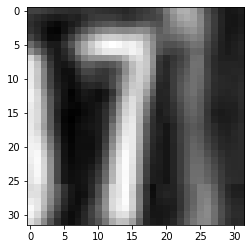

In [191]:
#Showing the image
plt.imshow(X_test[95].reshape(32,32),cmap='gray')

In [195]:
#Predicting the digits
nn_model1.predict_classes(X_test)[95]

7

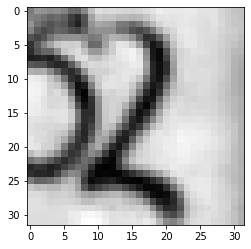

In [196]:
#Showing the image
plt.imshow(X_test[12008].reshape(32,32),cmap='gray')

In [197]:
#Predicting the digits
nn_model1.predict_classes(X_test)[12008]

2

### <font color= Navy > Method 5 </font>

In [198]:
test_result_2 = nn_model3.evaluate(X_test, y_test)
print('Test accuracy for method 5 (NN with Adam Optimizer with batch normalisation and dropout) : ', test_result_2[1])

563/563 [==============================] - 2s 3ms/step - loss: 0.5598 - accuracy: 0.8296
Test accuracy for method 5 (NN with Adam Optimizer with batch normalisation and dropout) :  0.8296111226081848


In [213]:
result_df = pd.DataFrame({'Method':['Method 5'], 'Desc' : ['NN with Adam Optimizer with batch normalisation and dropout'], 'accuracy': [test_result_2[1]]},index={'2'})
test_result_df= pd.concat([test_result_df, result_df])
test_result_df = test_result_df[['Method', 'Desc', 'accuracy']]
test_result_df

,Method,Desc,accuracy
0,Method 3,NN with Adam Optimizer with LR,0.821889
2,Method 5,NN with Adam Optimizer with batch normalisatio...,0.829611


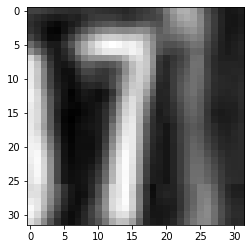

In [199]:
#Showing the image
plt.imshow(X_test[95].reshape(32,32),cmap='gray')

In [203]:
#Predicting the digits
nn_model3.predict_classes(X_test)[95]

7

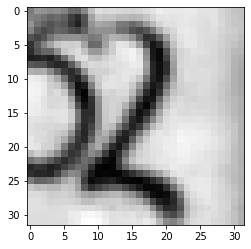

In [204]:
#Showing the image
plt.imshow(X_test[12008].reshape(32,32),cmap='gray')

In [205]:
#Predicting the digits
nn_model3.predict_classes(X_test)[12008]

2

<a id='summary'></a>

## <font color= Navy > Final Summary </font>

In [214]:
# Accuracy while training the model on validation set
results_on_val

,Method,accuracy
1,NN with SGD Optimizer,0.343300
2,NN with Adam Optimizer,0.761950
3,NN with Adam Optimizer with LR,0.890033
4,NN with Adam Optimizer with batch normalisation,0.802500
5,NN with Adam Optimizer with batch normalisatio...,0.871783


In [215]:
# Accuracy of final models on test set
test_result_df

,Method,Desc,accuracy
0,Method 3,NN with Adam Optimizer with LR,0.821889
2,Method 5,NN with Adam Optimizer with batch normalisatio...,0.829611



<font color= Navy > **Summary** </font>
<font color= Navy >
1.   Simple NN with Adam optimizer worked very and gave decent accuracy on Validation set of 76%
2.   Tunning learning rate on top of above model gave significant increase in accuracy i.e. 89% with very marginal overfitting. Also, the accuracy on test data is 82%
3. Final approach with Adam optimizer, Batch normalisation and dropout layer gave accuracy of 87% with zero or no overfitting problem. The accuracy on test data is 83% </font>
    

